In [8]:
pip install pandas numpy matplotlib scikit-learn tensorflow ta yfinance

Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed

Epoch 1/100



C:\Users\hanss\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: nan
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: nan
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: nan
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: nan
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: nan
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: nan
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: nan
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: nan
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: nan
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: nan
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: nan
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: nan
Epoch 13/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: nan
Epoch 14/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: nan
Epoch 15/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: nan
Epoch 16/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25m

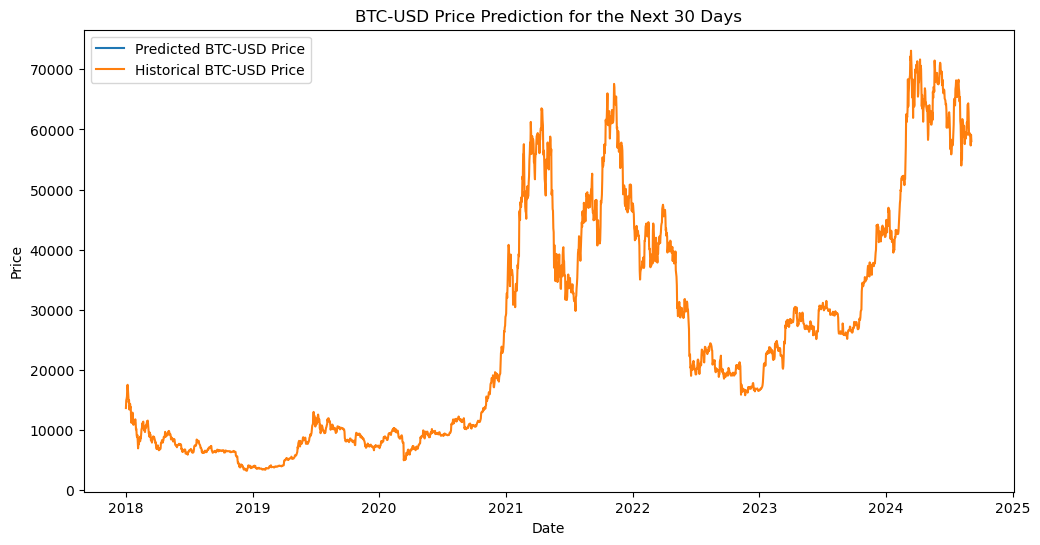

[*********************100%%**********************]  1 of 1 completed

Epoch 1/100



C:\Users\hanss\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: nan
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: nan
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: nan
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: nan
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: nan
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: nan
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: nan
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: nan
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: nan
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: nan
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: nan
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: nan
Epoch 13/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: nan
Epoch 14/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: nan
Epoch 15/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: nan
Epoch 16/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23m

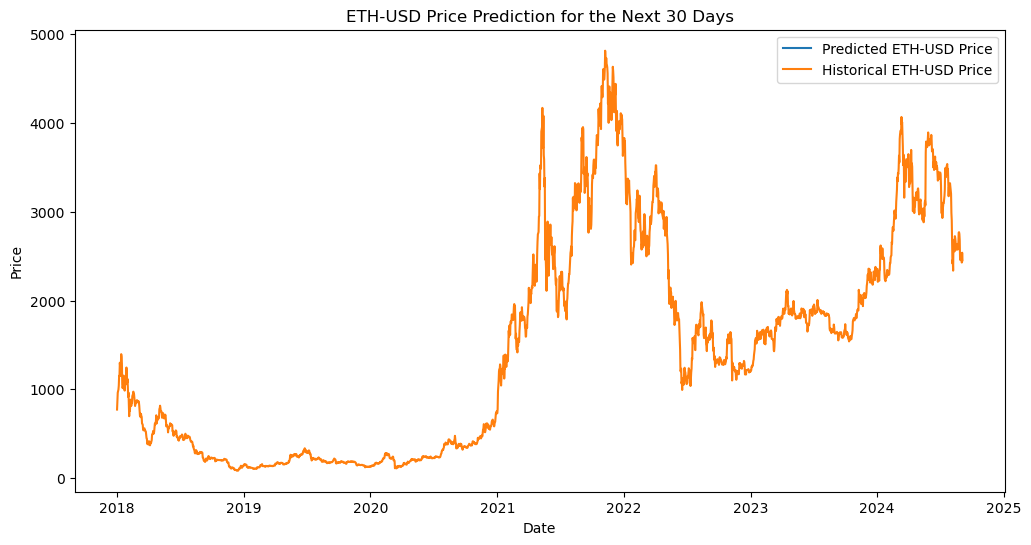

In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from ta.volatility import BollingerBands
from ta.trend import MACD
from ta.momentum import RSIIndicator

# Fetching data
def fetch_data(ticker, start_date):
    data = yf.download(ticker, start=start_date)
    return data

# Preprocess the data
def preprocess_data(df):
    # Bollinger Bands
    indicator_bb = BollingerBands(close=df['Close'], window=20, window_dev=2)
    df['bb_bbm'] = indicator_bb.bollinger_mavg()
    df['bb_bbh'] = indicator_bb.bollinger_hband()
    df['bb_bbl'] = indicator_bb.bollinger_lband()
    
    # MACD
    macd = MACD(close=df['Close'], window_slow=26, window_fast=12, window_sign=9)
    df['macd'] = macd.macd()
    df['macd_diff'] = macd.macd_diff()
    df['macd_signal'] = macd.macd_signal()
    
    # RSI
    rsi = RSIIndicator(close=df['Close'], window=14)
    df['rsi'] = rsi.rsi()
    
    # Normalize the dataset
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(df[['Close', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'macd', 'macd_diff', 'macd_signal', 'rsi']])
    
    return scaled_data, scaler

# Create training and testing datasets
def create_datasets(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, :])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Build LSTM Model
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Predicting future prices
def predict_future_prices(model, data, time_step, future_days=30):
    temp_input = list(data[-time_step:])
    temp_input = np.array(temp_input)
    future_prices = []
    
    for _ in range(future_days):
        if len(temp_input) > time_step:
            temp_input = temp_input[1:]
        
        input_data = temp_input.reshape(1, time_step, temp_input.shape[1])
        predicted_price = model.predict(input_data)
        future_prices.append(predicted_price[0, 0])
        
        # Reshape the predicted price to match the input shape
        predicted_price_reshaped = np.array([[predicted_price[0, 0]] * temp_input.shape[1]])
        
        temp_input = np.append(temp_input, predicted_price_reshaped, axis=0)
    
    return future_prices

# Main function to execute the model
def main():
    tickers = ['BTC-USD', 'ETH-USD']
    start_date = '2018-01-01'
    time_step = 60
    future_days = 30
    
    for ticker in tickers:
        df = fetch_data(ticker, start_date)
        df = df.dropna()
        
        scaled_data, scaler = preprocess_data(df)
        X, y = create_datasets(scaled_data, time_step)
        
        X_train, X_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):]
        y_train, y_test = y[:int(0.8*len(y))], y[int(0.8*len(y)):]
        
        model = build_model((X_train.shape[1], X_train.shape[2]))
        model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)
        
        # Predict future prices
        future_prices = predict_future_prices(model, scaled_data, time_step, future_days)
        future_prices = scaler.inverse_transform([[price] + [0]*(scaled_data.shape[1]-1) for price in future_prices])
        
        # Plotting the results
        plt.figure(figsize=(12,6))
        plt.plot(df.index[-len(future_prices):], future_prices[:, 0], label=f'Predicted {ticker} Price')
        plt.plot(df['Close'], label=f'Historical {ticker} Price')
        plt.title(f'{ticker} Price Prediction for the Next 30 Days')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    main()
